In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
df = pd.read_csv("D:/archive/dynamic_supply_chain_logistics_dataset.csv")

In [8]:
summary= df.describe()
print(summary)

       vehicle_gps_latitude  vehicle_gps_longitude  fuel_consumption_rate  \
count          32065.000000           32065.000000           32065.000000   
mean              38.023589             -90.116648               8.011735   
std                6.917909              17.369244               4.264960   
min               30.000000            -119.999998               5.000000   
25%               31.280550            -106.253913               5.019984   
50%               36.413820             -86.293414               5.636036   
75%               44.453655             -73.079367               9.669944   
max               50.000000             -70.000000              19.999875   

       eta_variation_hours  traffic_congestion_level  \
count         32065.000000              3.206500e+04   
mean              2.893068              4.991493e+00   
std               2.274044              3.532048e+00   
min              -1.999993              1.090000e-09   
25%               1.185744

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
disruption_likelihood_score        0
delay_probability                  0
risk_classification                0
delivery_time_deviation            0
dtype: int64


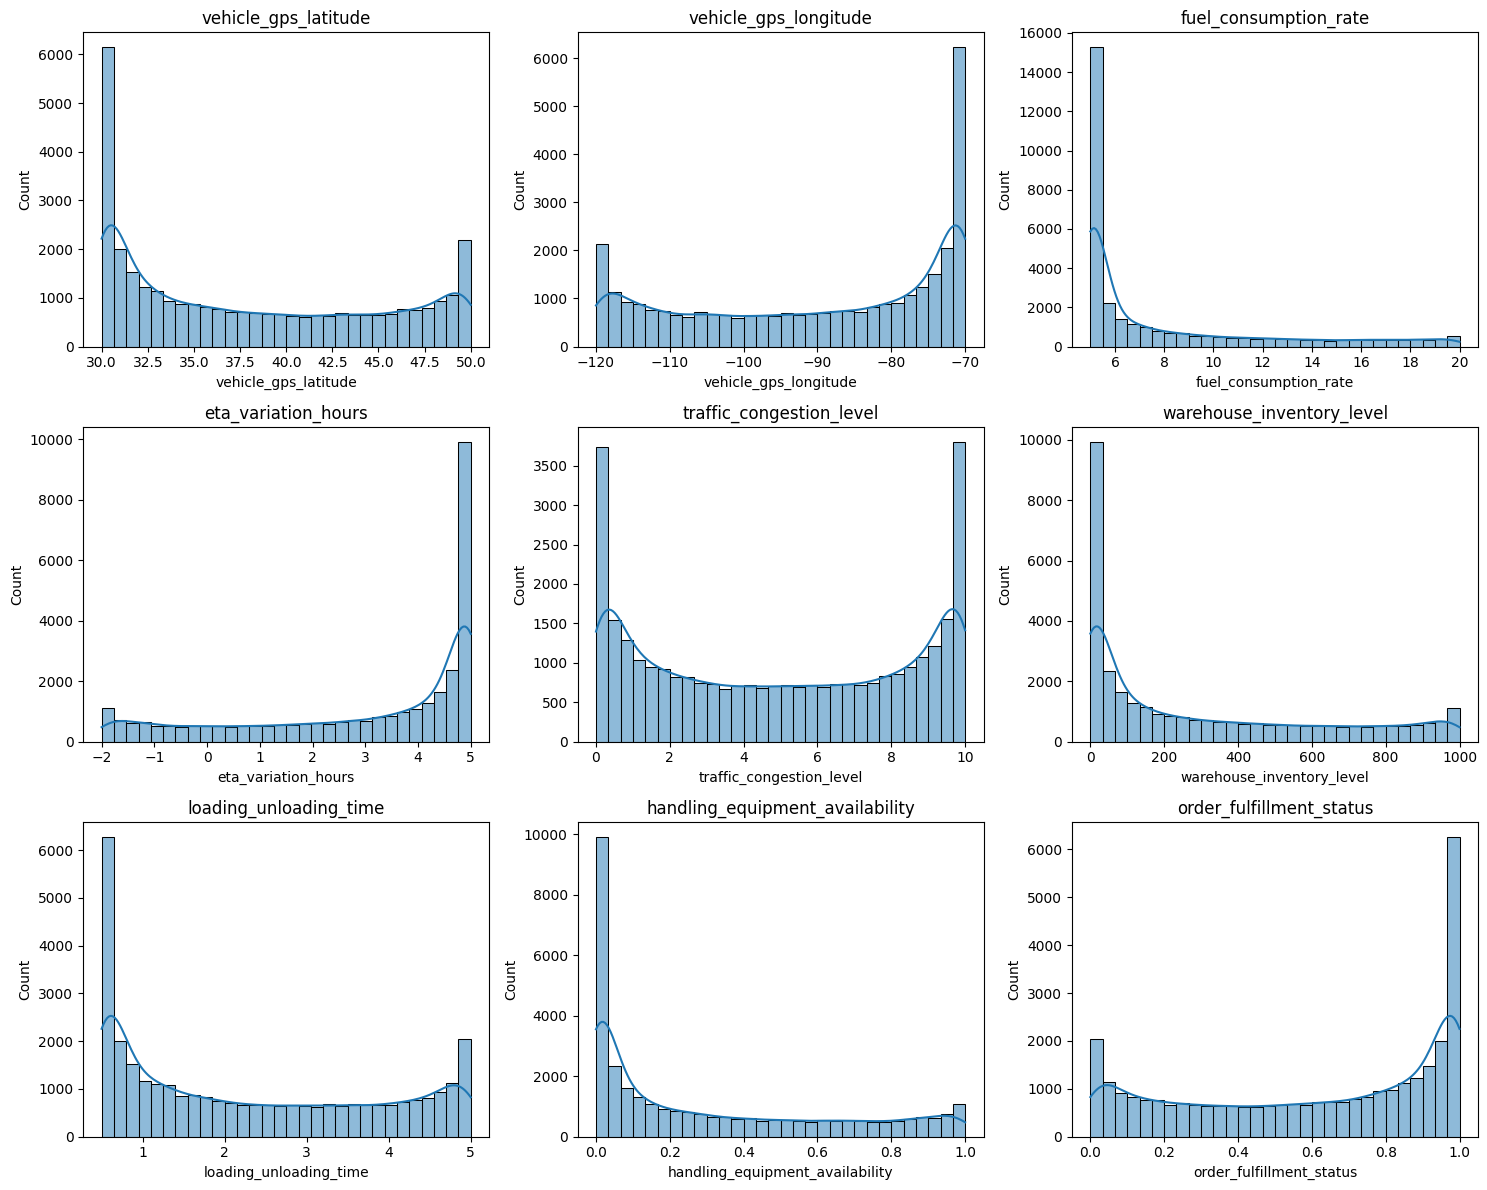

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

num_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols[:9], 1):  # Plot first 9 numeric variables
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()

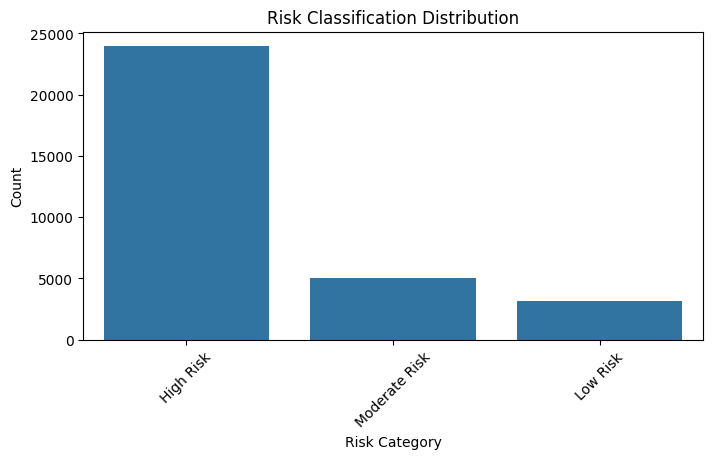

risk_classification
High Risk        23944
Moderate Risk     5011
Low Risk          3110
Name: count, dtype: int64

In [12]:

cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(8, 4))
sns.countplot(x=df['risk_classification'], order=df['risk_classification'].value_counts().index)
plt.title("Risk Classification Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Display categorical value counts
df['risk_classification'].value_counts()

In [13]:
# Group-wise statistics
risk_delay_stats = df.groupby("risk_classification")["delay_probability"].agg(["mean", "median", "std", "count"])

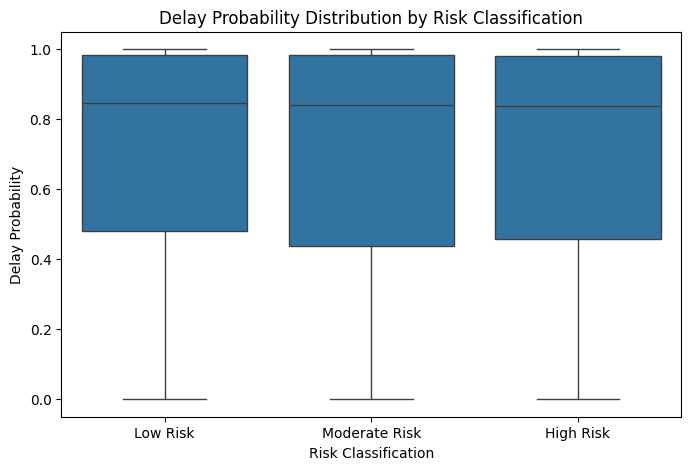

,mean,median,std,count
risk_classification,,,,
High Risk,0.698595,0.837838,0.324220,23944
Low Risk,0.706961,0.846757,0.321612,3110
Moderate Risk,0.696487,0.841587,0.327689,5011


In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["risk_classification"], y=df["delay_probability"], order=["Low Risk", "Moderate Risk", "High Risk"])
plt.title("Delay Probability Distribution by Risk Classification")
plt.xlabel("Risk Classification")
plt.ylabel("Delay Probability")
plt.show()

risk_delay_stats

In [15]:
df["risk_classification"].unique()

array(['Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

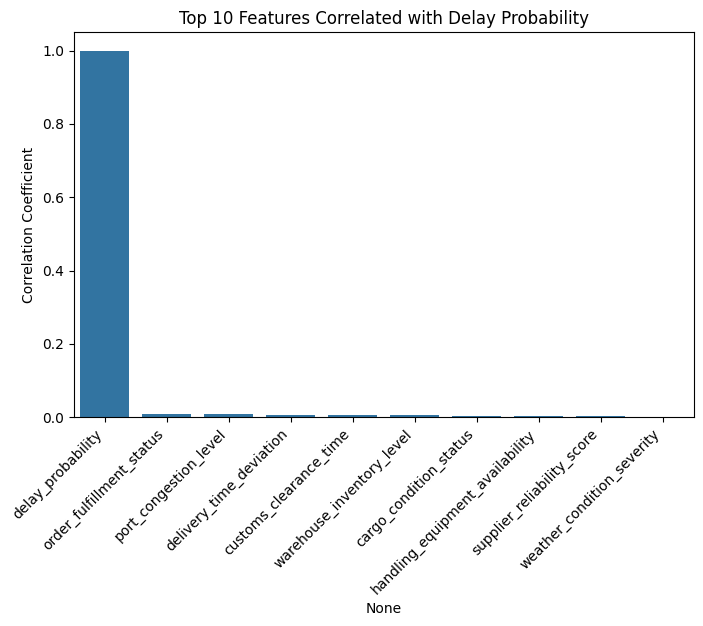

delay_probability                  1.000000
order_fulfillment_status           0.009730
port_congestion_level              0.008972
delivery_time_deviation            0.005530
customs_clearance_time             0.004896
warehouse_inventory_level          0.004686
cargo_condition_status             0.002910
handling_equipment_availability    0.002690
supplier_reliability_score         0.001890
weather_condition_severity         0.001503
lead_time_days                     0.001083
fatigue_monitoring_score           0.001070
shipping_costs                    -0.000280
loading_unloading_time            -0.000706
iot_temperature                   -0.001139
historical_demand                 -0.002907
route_risk_level                  -0.003407
traffic_congestion_level          -0.003790
driver_behavior_score             -0.003919
vehicle_gps_longitude             -0.005691
vehicle_gps_latitude              -0.006185
eta_variation_hours               -0.006897
disruption_likelihood_score     

In [16]:
numeric_df = df.select_dtypes(include=["number"])

correlations = numeric_df.corr()["delay_probability"].sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=correlations[:10].index, y=correlations[:10].values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Features Correlated with Delay Probability")
plt.ylabel("Correlation Coefficient")
plt.show()

# Display correlations
correlations


In [17]:
# Convert risk_classification into binary (Low Risk = 0, Others = 1)
risk_binary = df["risk_classification"].apply(lambda x: 0 if x == "low risk" else 1)

In [18]:
print(risk_binary)

0        1
1        1
2        1
3        1
4        1
        ..
32060    1
32061    1
32062    1
32063    1
32064    1
Name: risk_classification, Length: 32065, dtype: int64


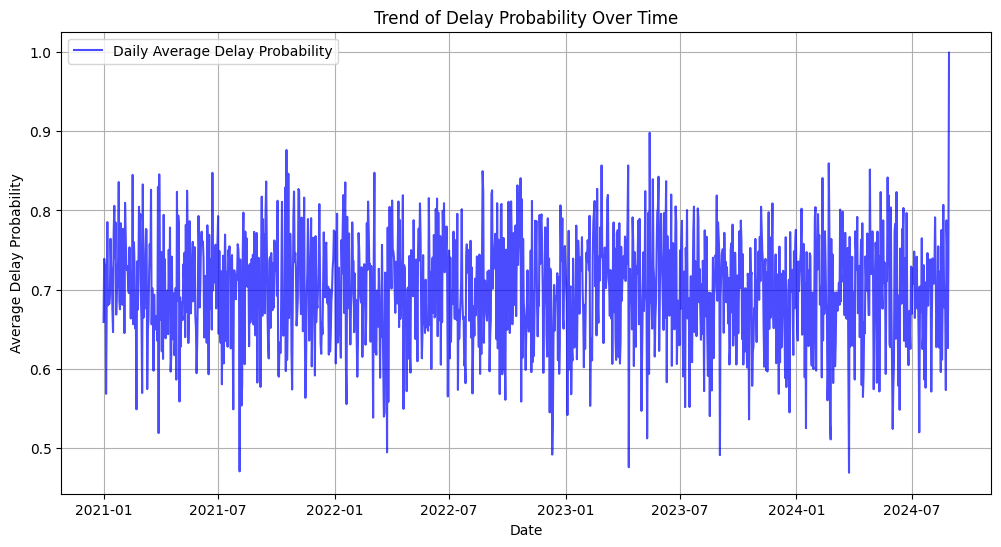

In [19]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Set timestamp as index
df.set_index("timestamp", inplace=True)

# Resample to daily average delay probability
daily_trend = df["delay_probability"].resample("D").mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_trend, label="Daily Average Delay Probability", color="b", alpha=0.7)
plt.title("Trend of Delay Probability Over Time")
plt.xlabel("Date")
plt.ylabel("Average Delay Probability")
plt.legend()
plt.grid(True)
plt.show()


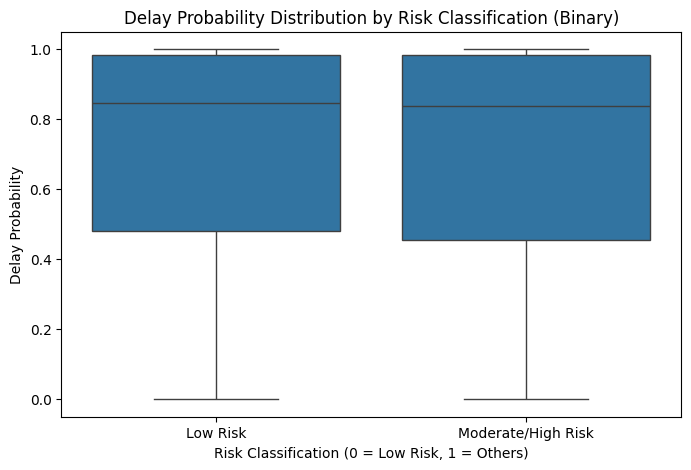

,mean,median,std,count
risk_binary,,,,
0,0.706961,0.846757,0.321612,3110
1,0.698230,0.838780,0.324819,28955


In [20]:
# Convert risk_classification into binary (Low Risk = 0, Others = 1)
df["risk_binary"] = df["risk_classification"].apply(lambda x: 0 if x.lower() == "low risk" else 1)

# Compute group-wise statistics based on risk_binary
risk_delay_stats_binary = df.groupby("risk_binary")["delay_probability"].agg(["mean", "median", "std", "count"])

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["risk_binary"], y=df["delay_probability"])
plt.title("Delay Probability Distribution by Risk Classification (Binary)")
plt.xlabel("Risk Classification (0 = Low Risk, 1 = Others)")
plt.ylabel("Delay Probability")
plt.xticks(ticks=[0, 1], labels=["Low Risk", "Moderate/High Risk"])
plt.show()

# Display statistics
risk_delay_stats_binary


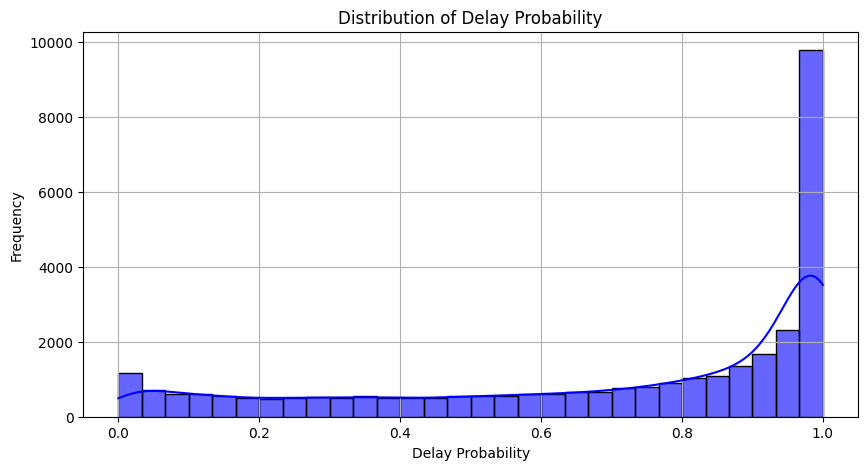

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df["delay_probability"], bins=30, kde=True, color="blue", alpha=0.6)
plt.title("Distribution of Delay Probability")
plt.xlabel("Delay Probability")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

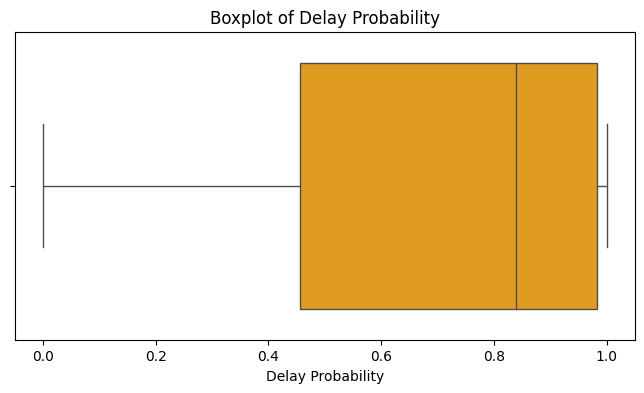

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["delay_probability"], color="orange")
plt.title("Boxplot of Delay Probability")
plt.xlabel("Delay Probability")
plt.show()

In [23]:
df["delay"] = df["delay_probability"].apply(lambda x: 1 if x > 0.7 else 0)

In [36]:
df["delay"].head(10)

timestamp
2021-01-01 00:00:00    1
2021-01-01 01:00:00    0
2021-01-01 02:00:00    1
2021-01-01 03:00:00    0
2021-01-01 04:00:00    1
2021-01-01 05:00:00    1
2021-01-01 06:00:00    0
2021-01-01 07:00:00    1
2021-01-01 08:00:00    0
2021-01-01 09:00:00    0
Name: delay, dtype: int64

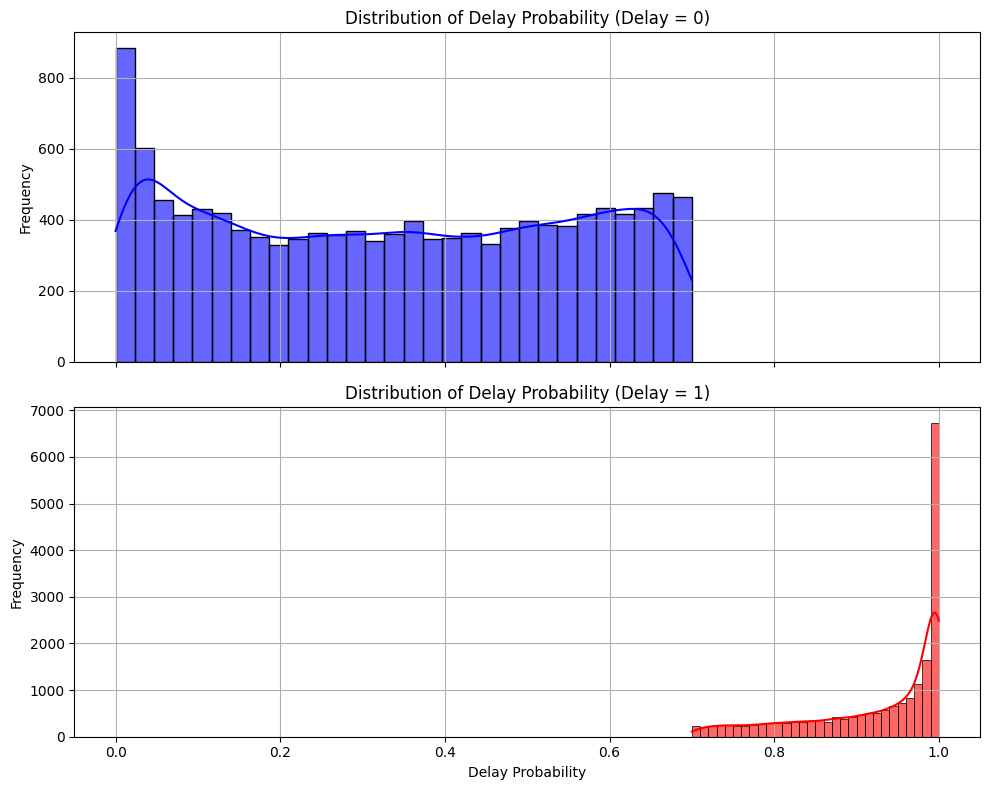

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.histplot(df[df["delay"] == 0]["delay_probability"], bins=30, kde=True, color="blue", alpha=0.6, ax=axes[0])
axes[0].set_title("Distribution of Delay Probability (Delay = 0)")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

sns.histplot(df[df["delay"] == 1]["delay_probability"], bins=30, kde=True, color="red", alpha=0.6, ax=axes[1])
axes[1].set_title("Distribution of Delay Probability (Delay = 1)")
axes[1].set_xlabel("Delay Probability")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [32]:
numeric_features = df.iloc[:, :-4].select_dtypes(include=["number"]).columns

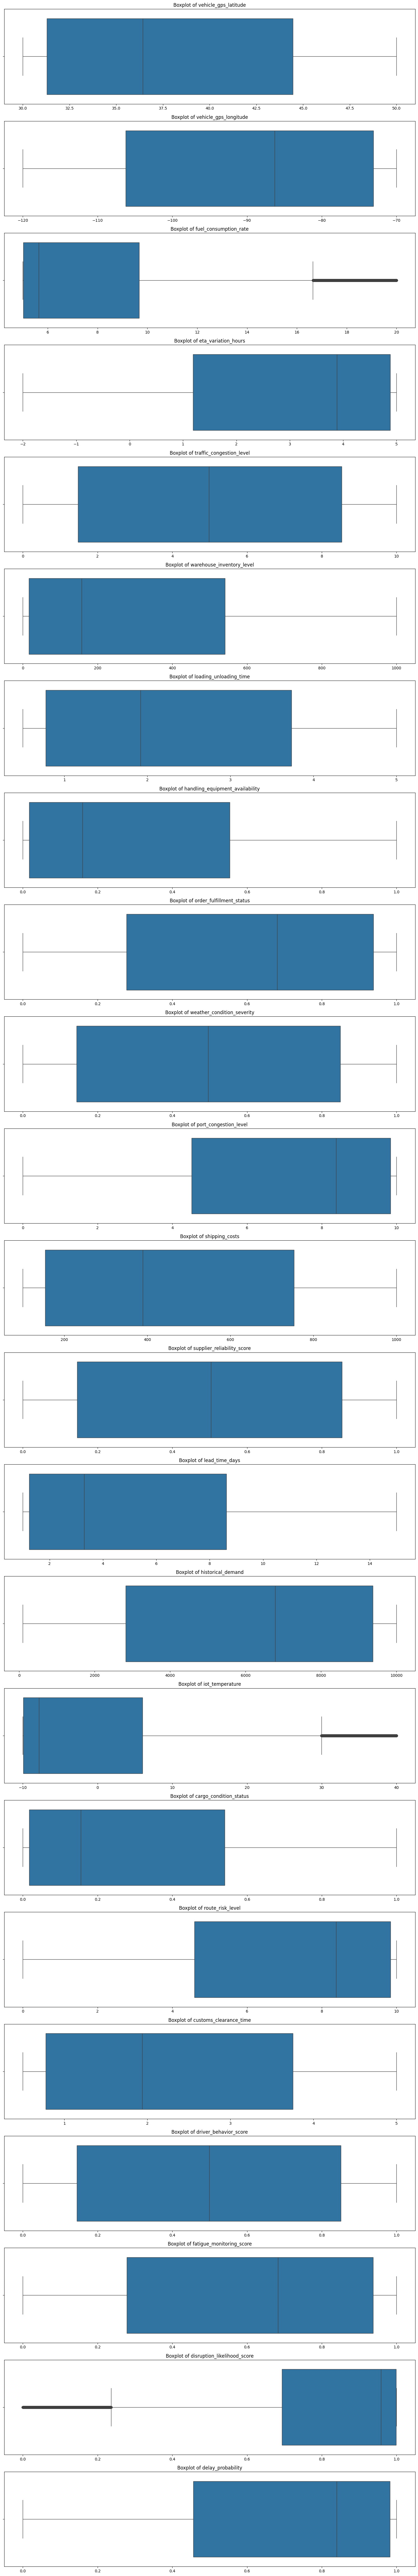

In [35]:

plt.figure(figsize=(15, len(numeric_features) * 4))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.show()

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd

In [21]:
# Load a specific sheet
df = pd.read_excel("D:/updated_supply_chain_logistics.xlsx")

# Display the first few rows
print(df.head())

             timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
0  2021-01-01 00:00:00             40.375568             -77.014318   
1  2021-01-01 01:00:00             33.507818            -117.036902   
2  2021-01-01 02:00:00             30.020640             -75.269224   
3  2021-01-01 03:00:00             36.649223             -70.190529   
4  2021-01-01 04:00:00             30.001279             -70.012195   

   fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
0               5.136512             4.998009                  5.927586   
1               5.101512             0.984929                  1.591992   
2               5.090803             4.972665                  8.787765   
3               8.219558             3.095064                  0.045257   
4               5.000075             3.216077                  8.004851   

   warehouse_inventory_level  loading_unloading_time  \
0                 985.716862                4.951392   
1         

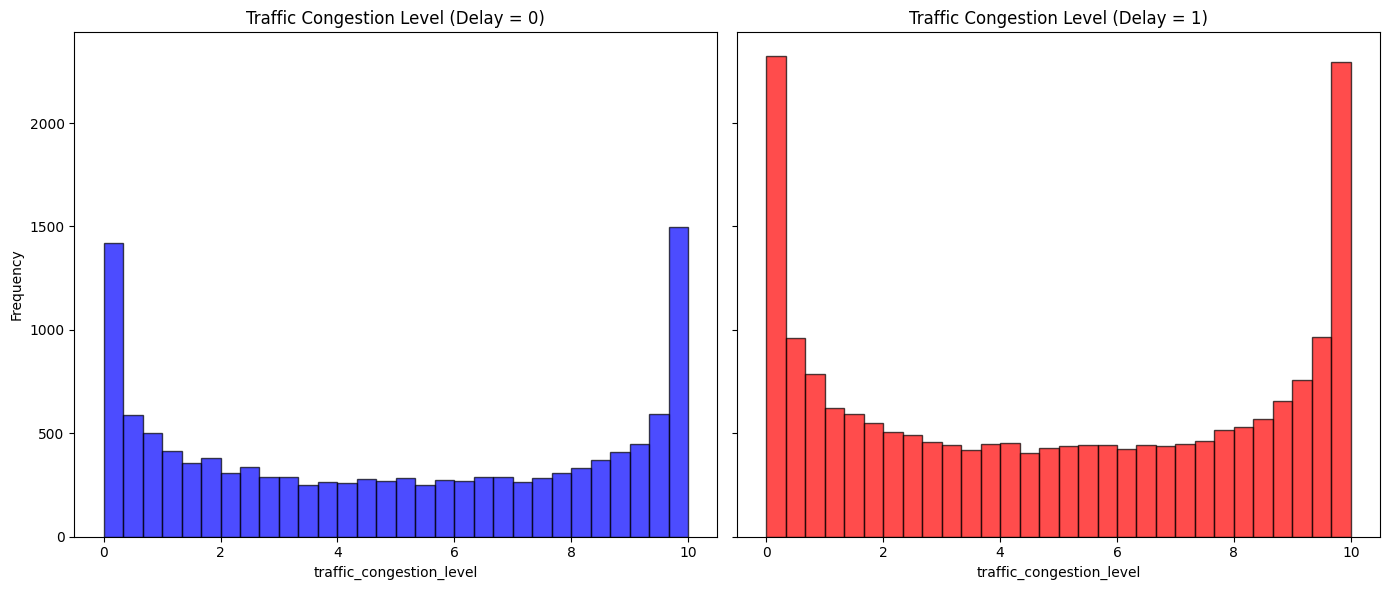

In [22]:
# Selecting the 'traffic_congestion_level' variable
variable = "traffic_congestion_level"

# Filtering data for delay = 0 and delay = 1
df_delay_0 = df[df["delay"] == 0][variable]
df_delay_1 = df[df["delay"] == 1][variable]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("Traffic Congestion Level (Delay = 0)")
axes[0].set_xlabel(variable)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("Traffic Congestion Level (Delay = 1)")
axes[1].set_xlabel(variable)

plt.tight_layout()
plt.show()


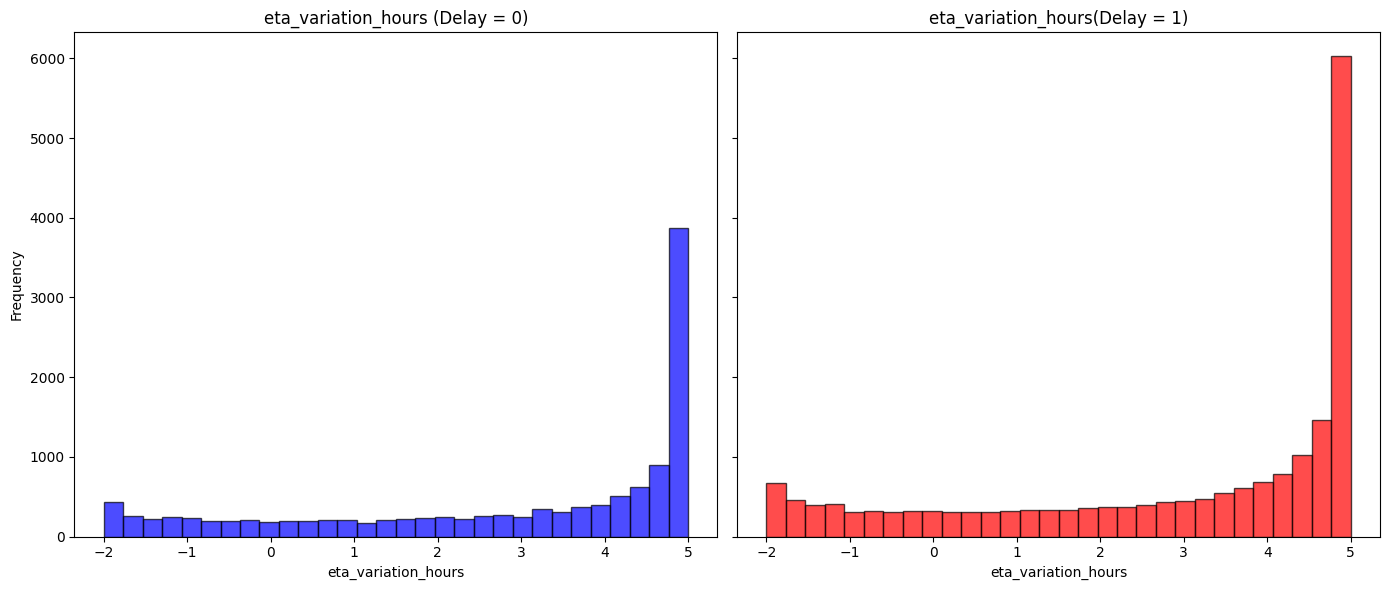

In [24]:
# Selecting the 'traffic_congestion_level' variable
variable1 = "eta_variation_hours"

# Filtering data for delay = 0 and delay = 1
df_delay1_0 = df[df["delay"] == 0][variable1]
df_delay1_1 = df[df["delay"] == 1][variable1]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay1_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("eta_variation_hours (Delay = 0)")
axes[0].set_xlabel(variable1)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay1_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("eta_variation_hours(Delay = 1)")
axes[1].set_xlabel(variable1)

plt.tight_layout()
plt.show()

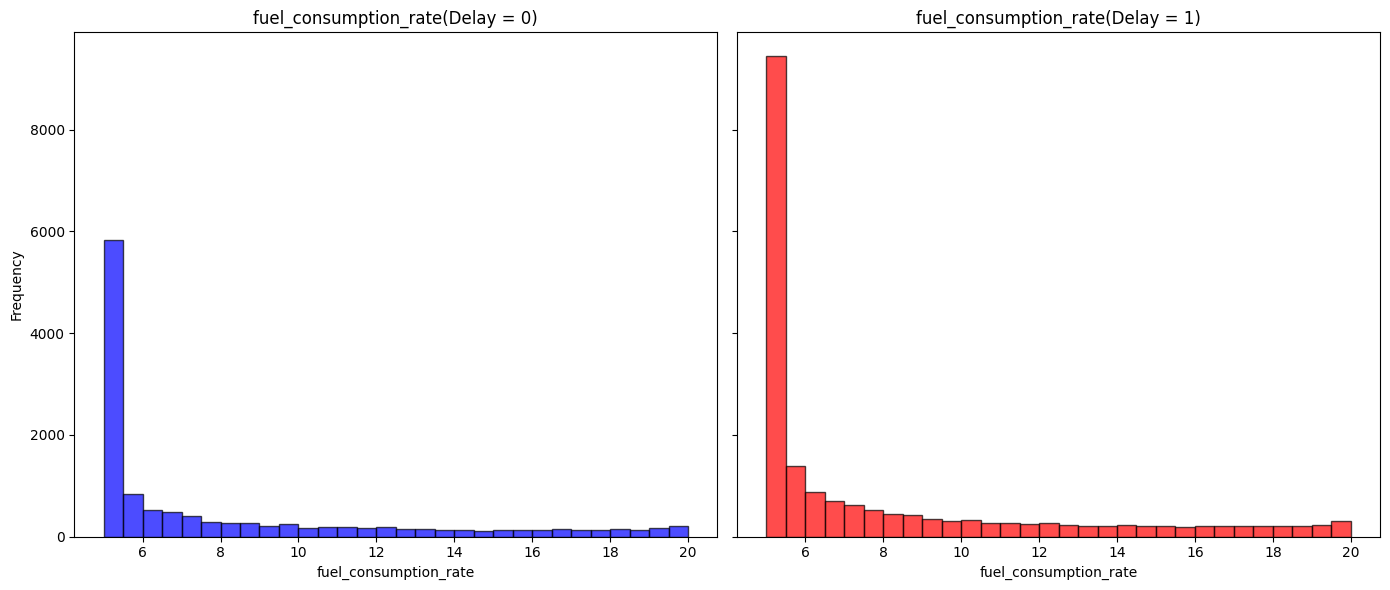

In [25]:
# Selecting the 'traffic_congestion_level' variable
variable2 = "fuel_consumption_rate"

# Filtering data for delay = 0 and delay = 1
df_delay2_0 = df[df["delay"] == 0][variable2]
df_delay2_1 = df[df["delay"] == 1][variable2]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay2_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("fuel_consumption_rate(Delay = 0)")
axes[0].set_xlabel(variable2)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay2_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("fuel_consumption_rate(Delay = 1)")
axes[1].set_xlabel(variable2)

plt.tight_layout()
plt.show()

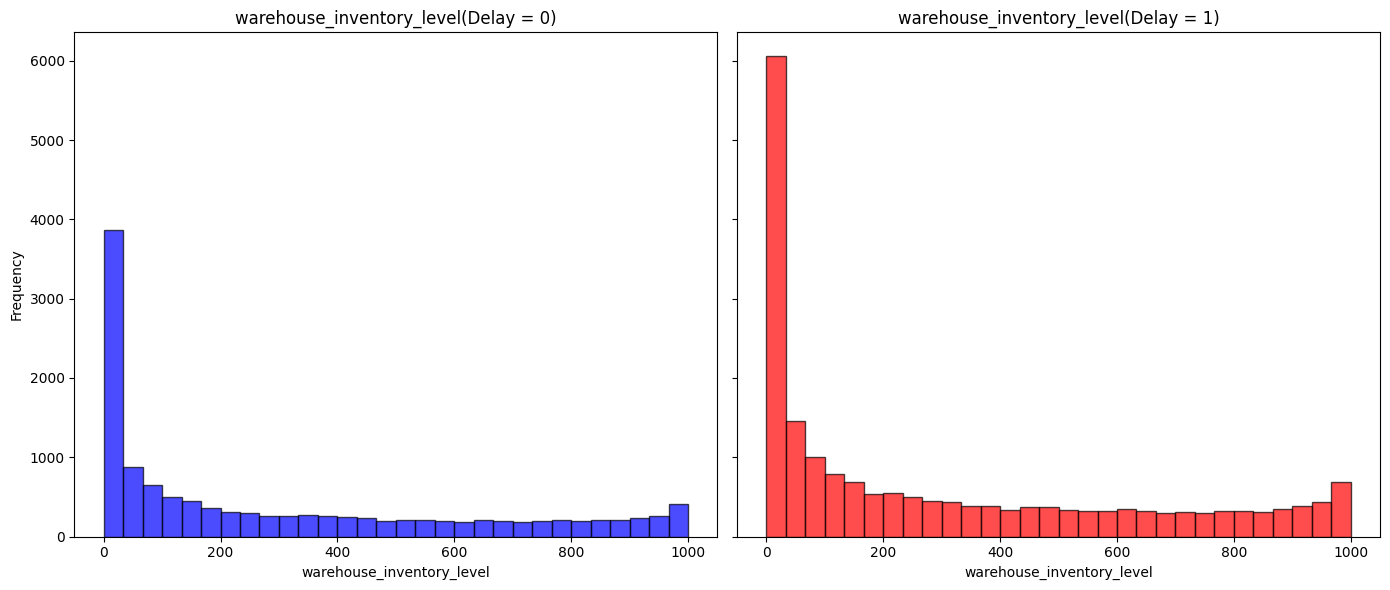

In [26]:
# Selecting the 'traffic_congestion_level' variable
variable3 = "warehouse_inventory_level"

# Filtering data for delay = 0 and delay = 1
df_delay3_0 = df[df["delay"] == 0][variable3]
df_delay3_1 = df[df["delay"] == 1][variable3]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay3_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("warehouse_inventory_level(Delay = 0)")
axes[0].set_xlabel(variable3)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay3_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("warehouse_inventory_level(Delay = 1)")
axes[1].set_xlabel(variable3)

plt.tight_layout()
plt.show()

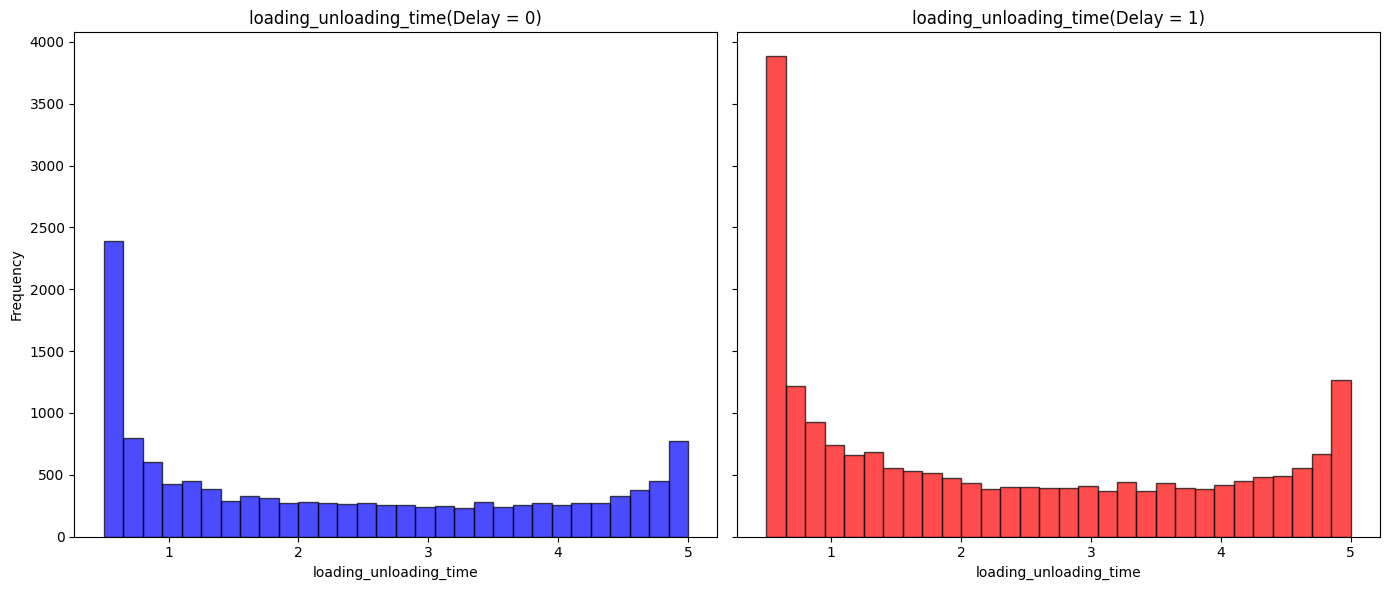

In [27]:
# Selecting the 'traffic_congestion_level' variable
variable4 = "loading_unloading_time"

# Filtering data for delay = 0 and delay = 1
df_delay4_0 = df[df["delay"] == 0][variable4]
df_delay4_1 = df[df["delay"] == 1][variable4]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay4_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("loading_unloading_time(Delay = 0)")
axes[0].set_xlabel(variable4)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay4_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("loading_unloading_time(Delay = 1)")
axes[1].set_xlabel(variable4)

plt.tight_layout()
plt.show()

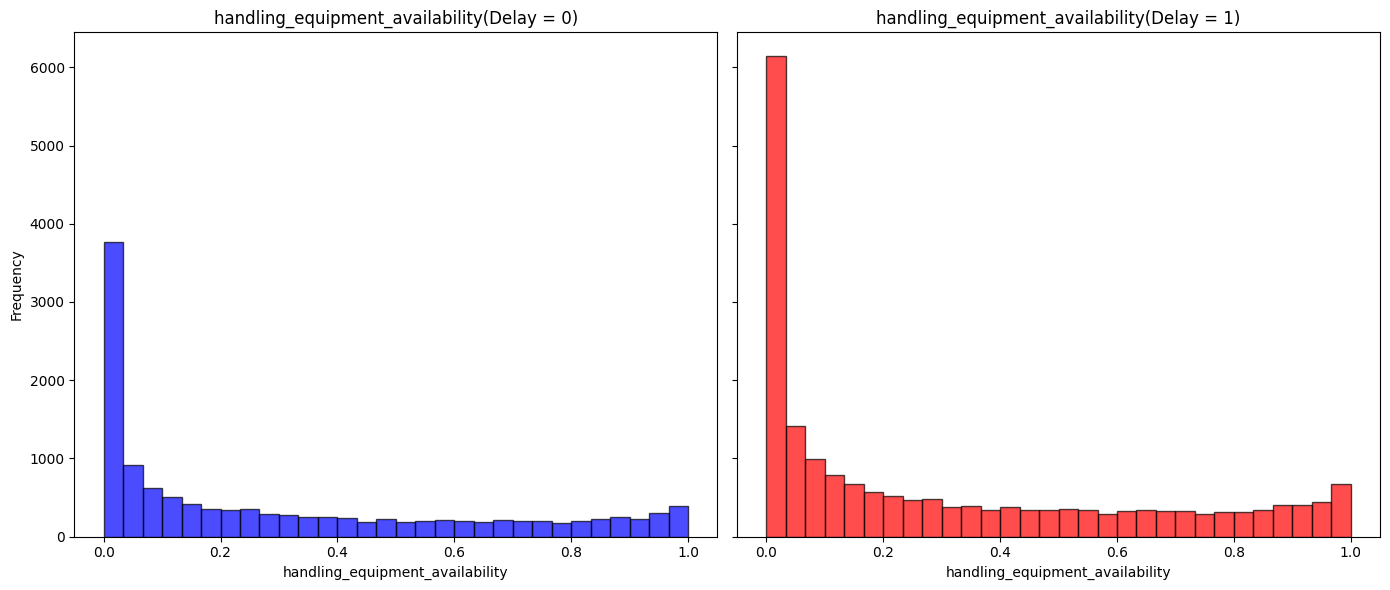

In [28]:
# Selecting the 'traffic_congestion_level' variable
variable5 = "handling_equipment_availability"

# Filtering data for delay = 0 and delay = 1
df_delay5_0 = df[df["delay"] == 0][variable5]
df_delay5_1 = df[df["delay"] == 1][variable5]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay5_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("handling_equipment_availability(Delay = 0)")
axes[0].set_xlabel(variable5)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay5_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("handling_equipment_availability(Delay = 1)")
axes[1].set_xlabel(variable5)

plt.tight_layout()
plt.show()

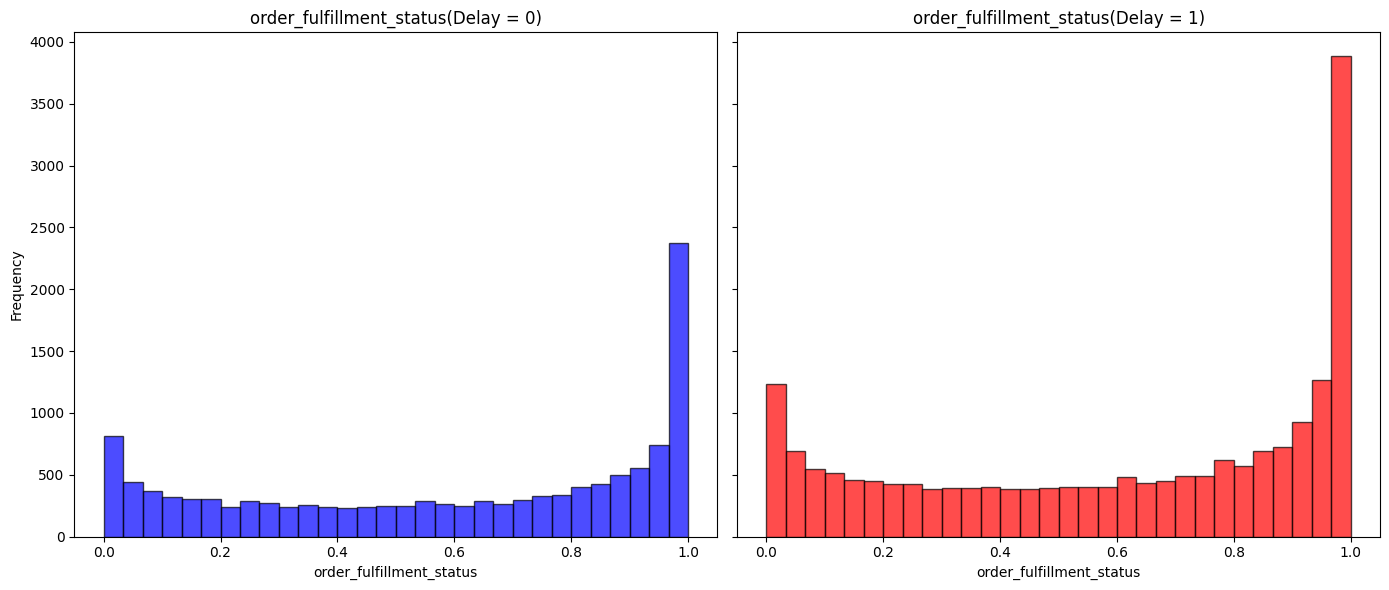

In [29]:
# Selecting the 'traffic_congestion_level' variable
variable6 = "order_fulfillment_status"

# Filtering data for delay = 0 and delay = 1
df_delay6_0 = df[df["delay"] == 0][variable6]
df_delay6_1 = df[df["delay"] == 1][variable6]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay6_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("order_fulfillment_status(Delay = 0)")
axes[0].set_xlabel(variable6)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay6_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("order_fulfillment_status(Delay = 1)")
axes[1].set_xlabel(variable6)

plt.tight_layout()
plt.show()

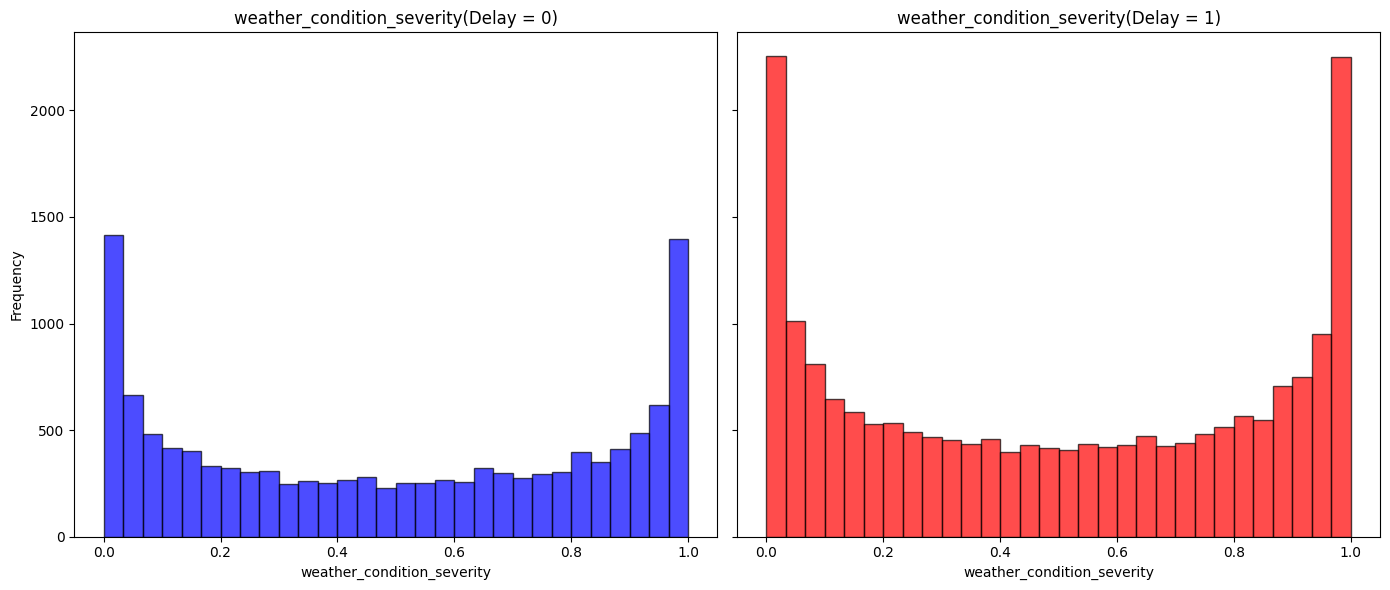

In [30]:
# Selecting the 'traffic_congestion_level' variable
variable7 = "weather_condition_severity"

# Filtering data for delay = 0 and delay = 1
df_delay7_0 = df[df["delay"] == 0][variable7]
df_delay7_1 = df[df["delay"] == 1][variable7]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay7_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("weather_condition_severity(Delay = 0)")
axes[0].set_xlabel(variable7)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay7_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("weather_condition_severity(Delay = 1)")
axes[1].set_xlabel(variable7)

plt.tight_layout()
plt.show()

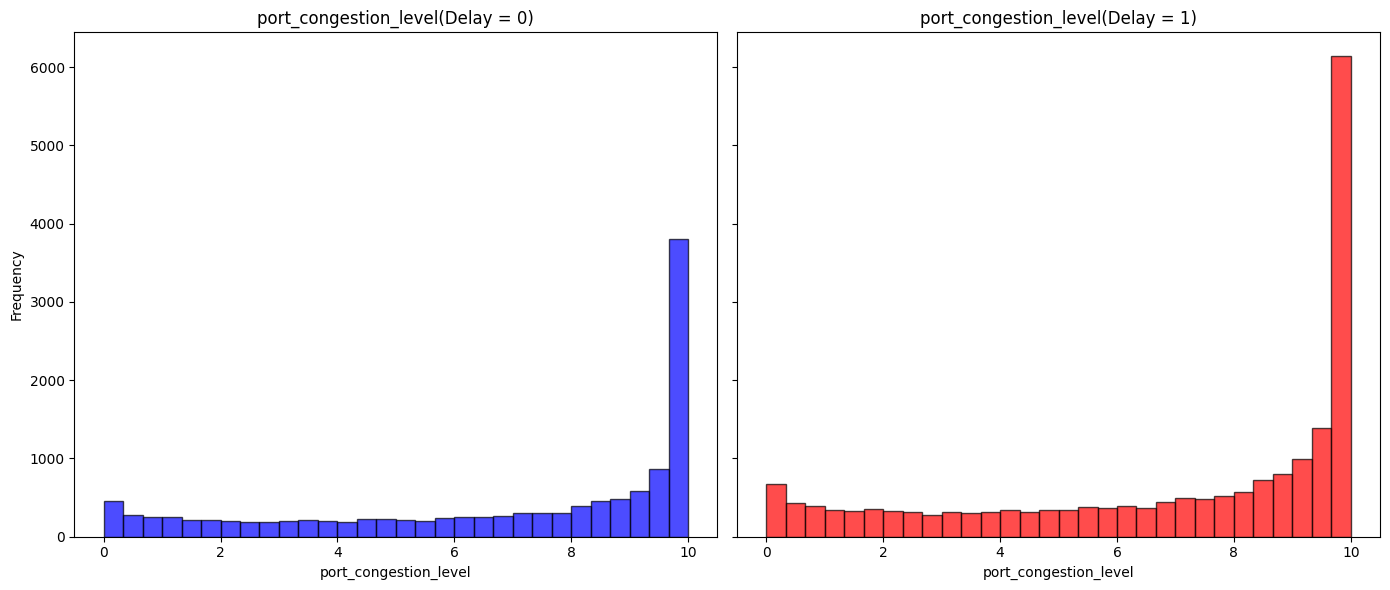

In [31]:
# Selecting the 'traffic_congestion_level' variable
variable8 = "port_congestion_level"

# Filtering data for delay = 0 and delay = 1
df_delay8_0 = df[df["delay"] == 0][variable8]
df_delay8_1 = df[df["delay"] == 1][variable8]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay8_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("port_congestion_level(Delay = 0)")
axes[0].set_xlabel(variable8)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay8_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("port_congestion_level(Delay = 1)")
axes[1].set_xlabel(variable8)

plt.tight_layout()
plt.show()

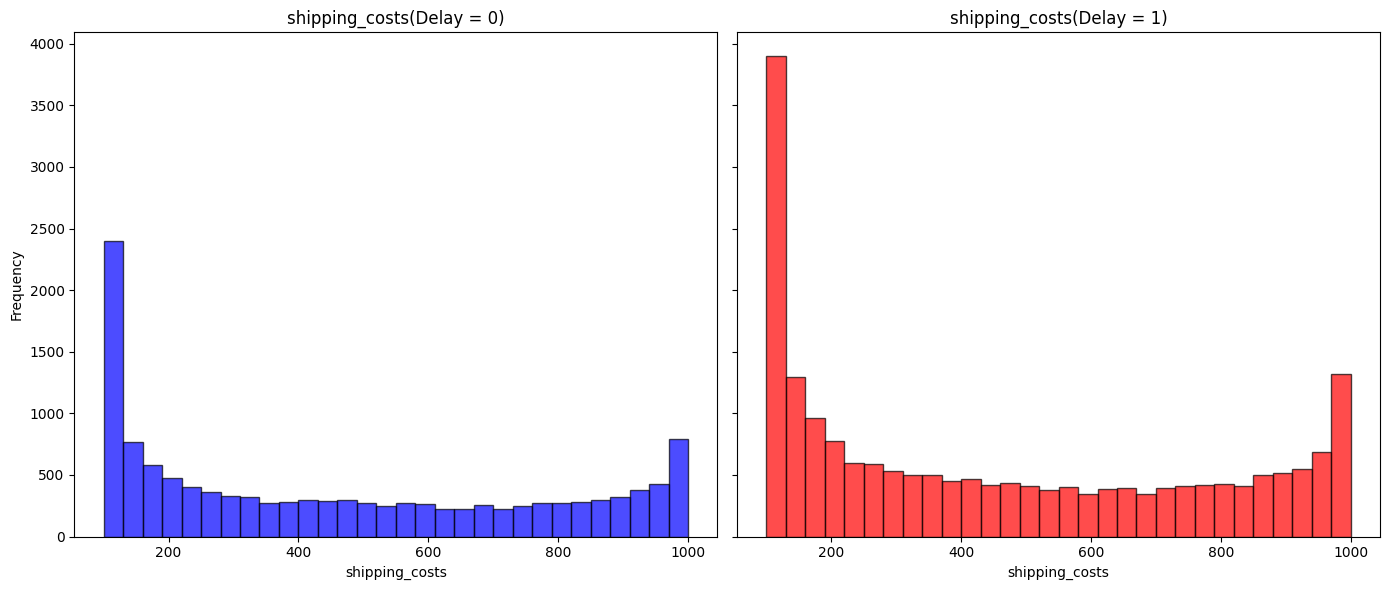

In [32]:
# Selecting the 'traffic_congestion_level' variable
variable9 = "shipping_costs"

# Filtering data for delay = 0 and delay = 1
df_delay9_0 = df[df["delay"] == 0][variable9]
df_delay9_1 = df[df["delay"] == 1][variable9]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay9_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("shipping_costs(Delay = 0)")
axes[0].set_xlabel(variable9)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay9_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("shipping_costs(Delay = 1)")
axes[1].set_xlabel(variable9)

plt.tight_layout()
plt.show()

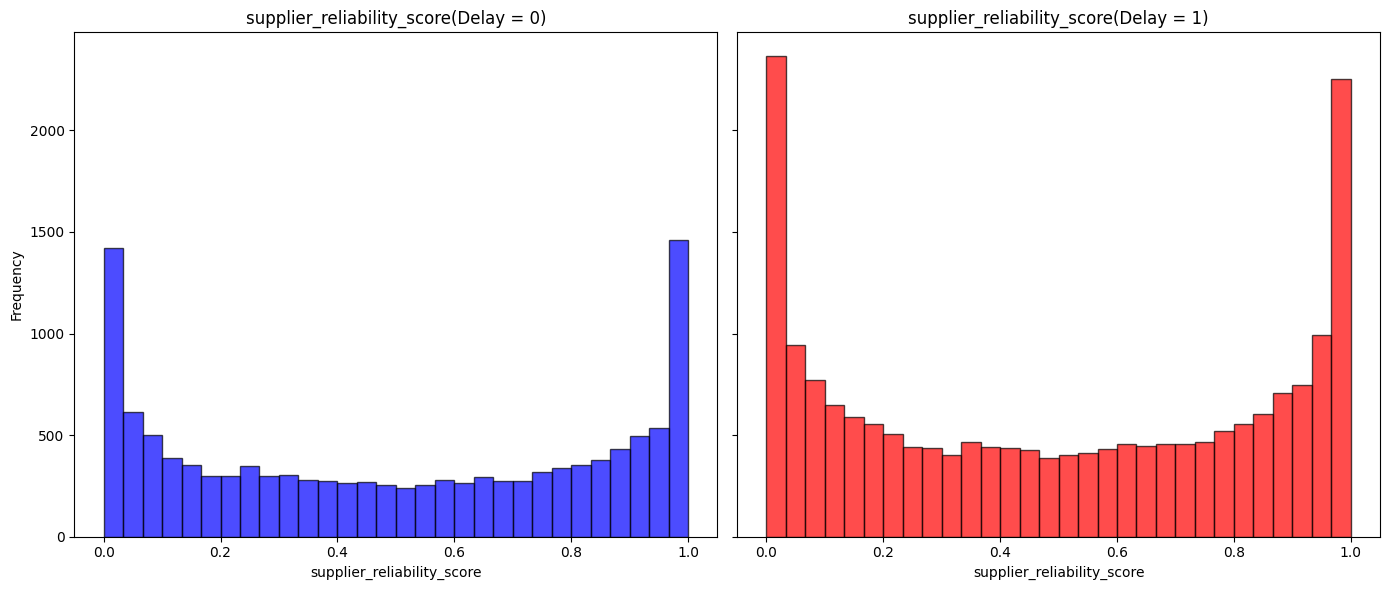

In [33]:
# Selecting the 'traffic_congestion_level' variable
variable10 = "supplier_reliability_score"

# Filtering data for delay = 0 and delay = 1
df_delay10_0 = df[df["delay"] == 0][variable10]
df_delay10_1 = df[df["delay"] == 1][variable10]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay10_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("supplier_reliability_score(Delay = 0)")
axes[0].set_xlabel(variable10)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay10_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("supplier_reliability_score(Delay = 1)")
axes[1].set_xlabel(variable10)

plt.tight_layout()
plt.show()

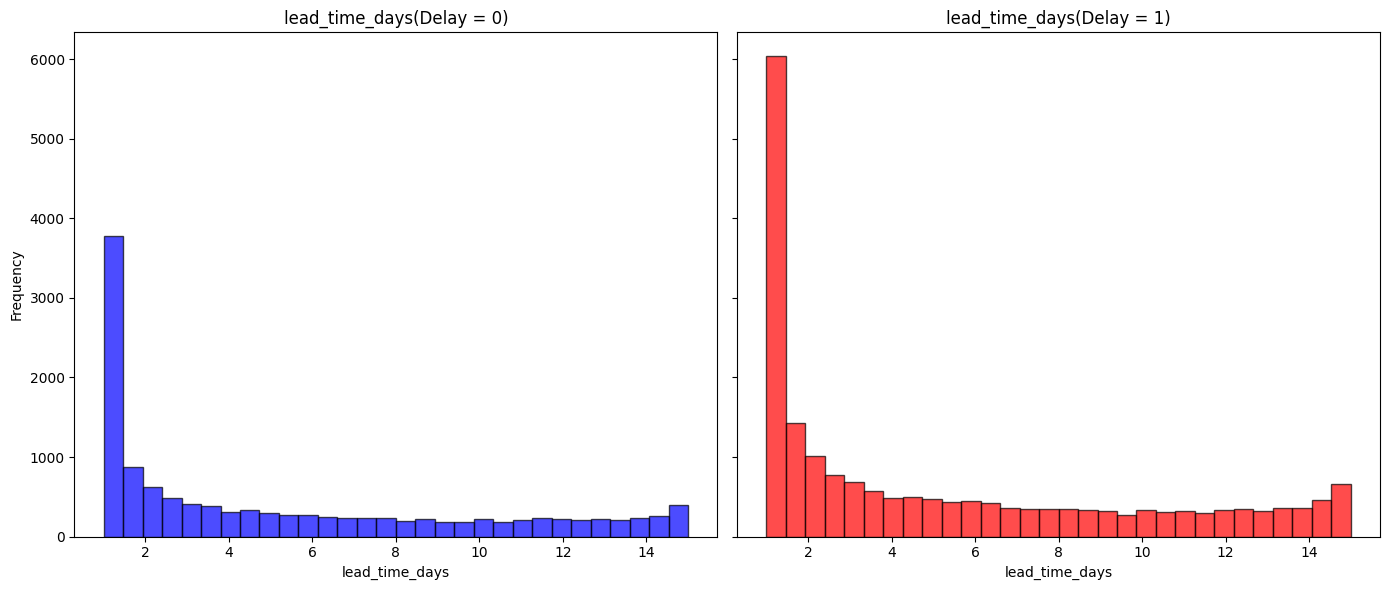

In [35]:
# Selecting the 'traffic_congestion_level' variable
variable11 = "lead_time_days"

# Filtering data for delay = 0 and delay = 1
df_delay11_0 = df[df["delay"] == 0][variable11]
df_delay11_1 = df[df["delay"] == 1][variable11]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay11_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("lead_time_days(Delay = 0)")
axes[0].set_xlabel(variable11)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay11_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("lead_time_days(Delay = 1)")
axes[1].set_xlabel(variable11)

plt.tight_layout()
plt.show()

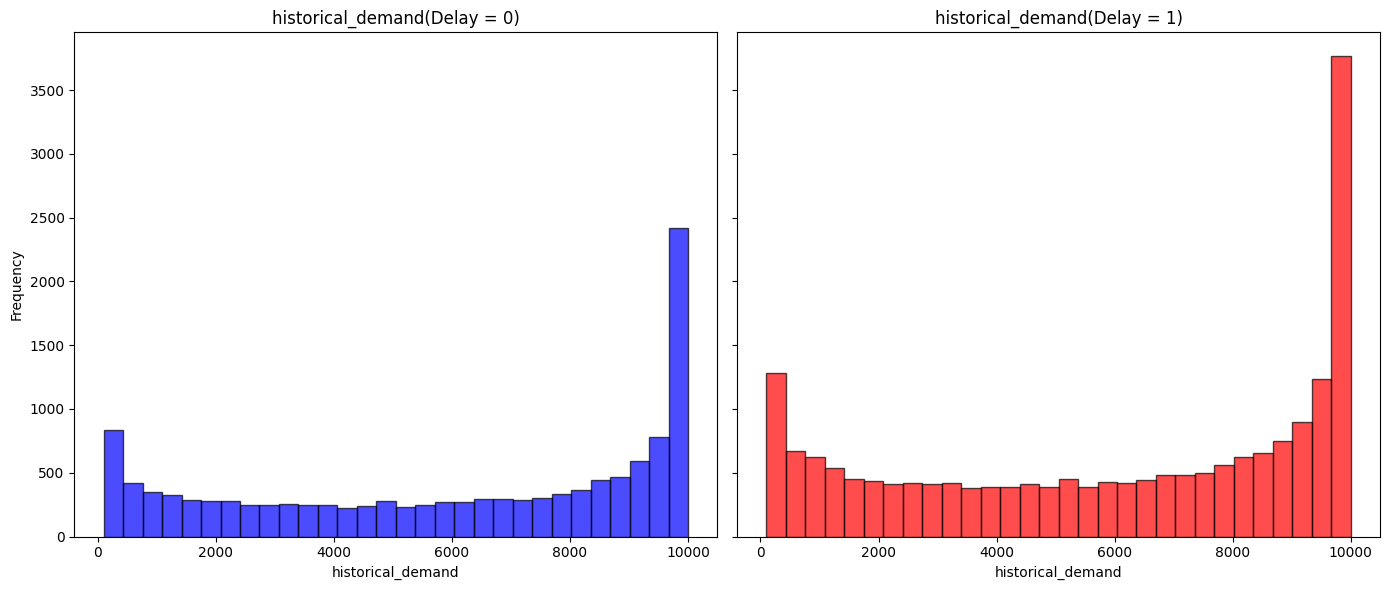

In [36]:
# Selecting the 'traffic_congestion_level' variable
variable12 = "historical_demand"

# Filtering data for delay = 0 and delay = 1
df_delay12_0 = df[df["delay"] == 0][variable12]
df_delay12_1 = df[df["delay"] == 1][variable12]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay12_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("historical_demand(Delay = 0)")
axes[0].set_xlabel(variable12)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay12_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("historical_demand(Delay = 1)")
axes[1].set_xlabel(variable12)

plt.tight_layout()
plt.show()

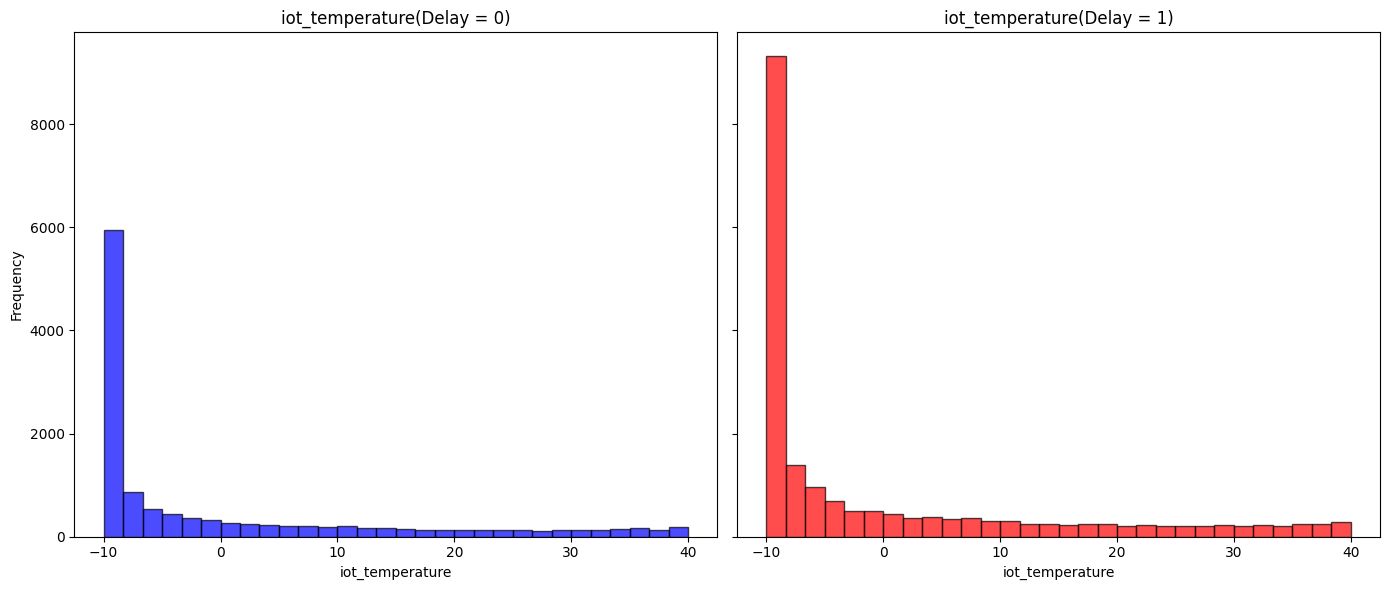

In [37]:
# Selecting the 'traffic_congestion_level' variable
variable13 = "iot_temperature"

# Filtering data for delay = 0 and delay = 1
df_delay13_0 = df[df["delay"] == 0][variable13]
df_delay13_1 = df[df["delay"] == 1][variable13]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay13_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("iot_temperature(Delay = 0)")
axes[0].set_xlabel(variable13)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay13_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("iot_temperature(Delay = 1)")
axes[1].set_xlabel(variable13)

plt.tight_layout()
plt.show()

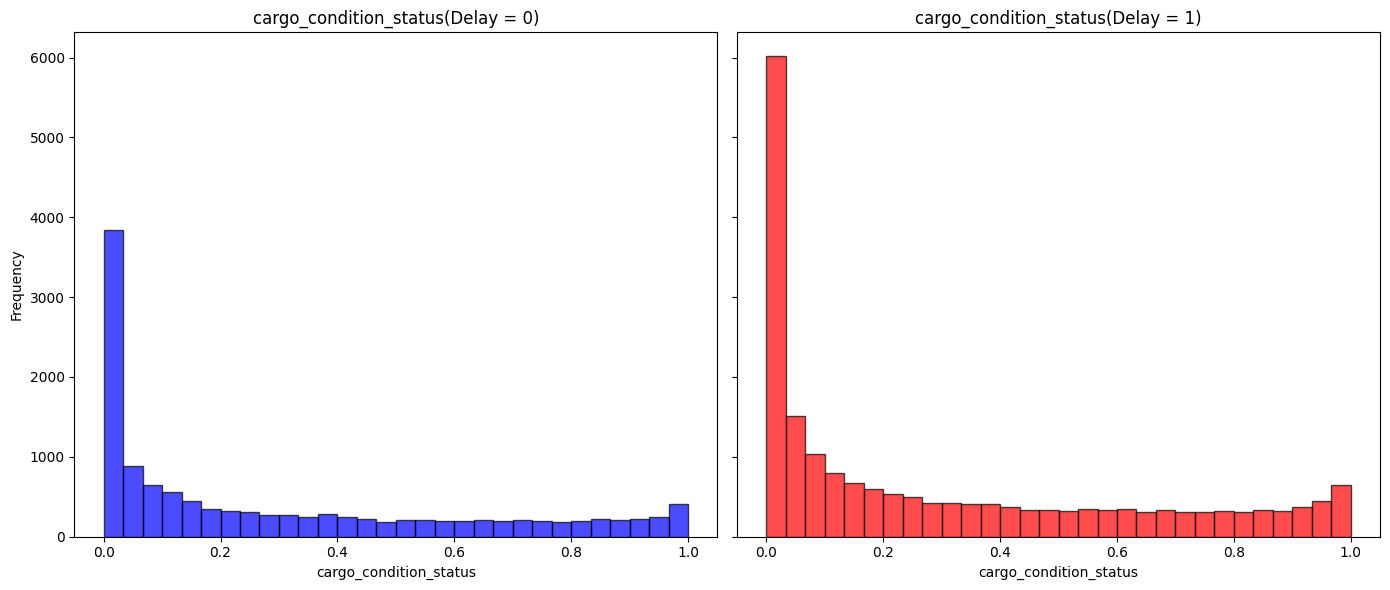

In [38]:
# Selecting the 'traffic_congestion_level' variable
variable14 = "cargo_condition_status"

# Filtering data for delay = 0 and delay = 1
df_delay14_0 = df[df["delay"] == 0][variable14]
df_delay14_1 = df[df["delay"] == 1][variable14]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay14_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("cargo_condition_status(Delay = 0)")
axes[0].set_xlabel(variable14)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay14_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("cargo_condition_status(Delay = 1)")
axes[1].set_xlabel(variable14)

plt.tight_layout()
plt.show()

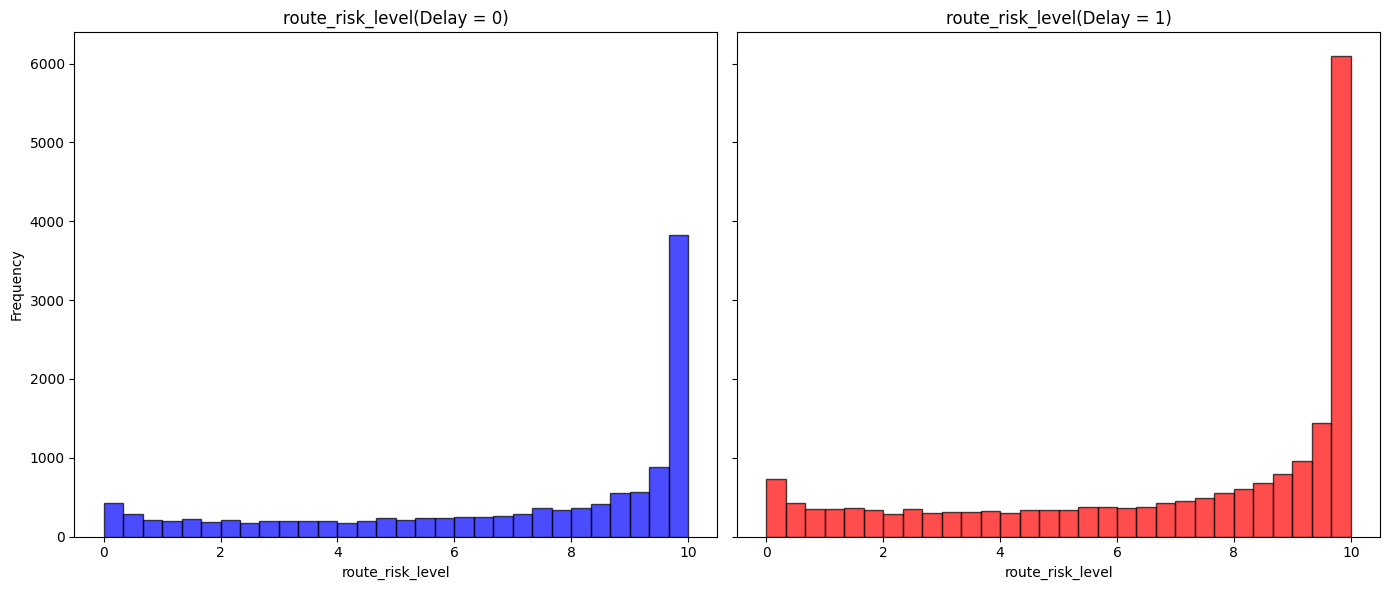

In [39]:
# Selecting the 'traffic_congestion_level' variable
variable15 = "route_risk_level"

# Filtering data for delay = 0 and delay = 1
df_delay15_0 = df[df["delay"] == 0][variable15]
df_delay15_1 = df[df["delay"] == 1][variable15]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay15_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("route_risk_level(Delay = 0)")
axes[0].set_xlabel(variable15)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay15_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("route_risk_level(Delay = 1)")
axes[1].set_xlabel(variable15)

plt.tight_layout()
plt.show()


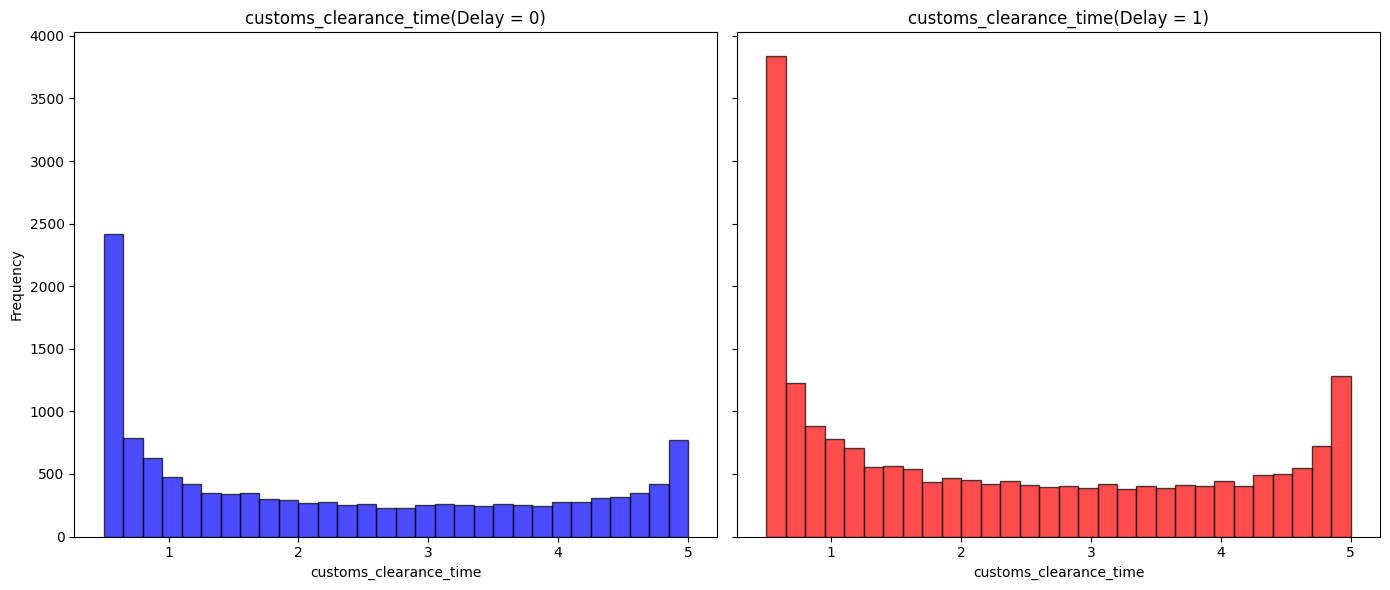

In [40]:
# Selecting the 'traffic_congestion_level' variable
variable16 = "customs_clearance_time"

# Filtering data for delay = 0 and delay = 1
df_delay16_0 = df[df["delay"] == 0][variable16]
df_delay16_1 = df[df["delay"] == 1][variable16]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay16_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("customs_clearance_time(Delay = 0)")
axes[0].set_xlabel(variable16)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay16_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("customs_clearance_time(Delay = 1)")
axes[1].set_xlabel(variable16)

plt.tight_layout()
plt.show()


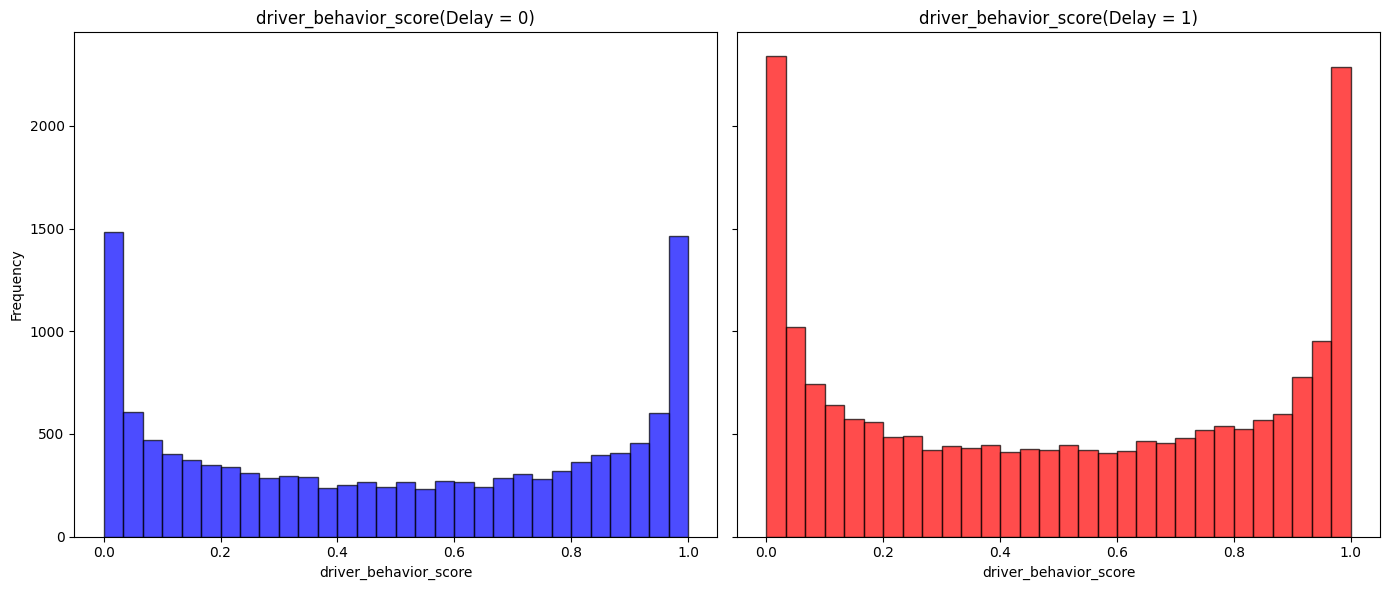

In [41]:
# Selecting the 'traffic_congestion_level' variable
variable17 = "driver_behavior_score"

# Filtering data for delay = 0 and delay = 1
df_delay17_0 = df[df["delay"] == 0][variable17]
df_delay17_1 = df[df["delay"] == 1][variable17]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay17_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("driver_behavior_score(Delay = 0)")
axes[0].set_xlabel(variable17)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay17_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("driver_behavior_score(Delay = 1)")
axes[1].set_xlabel(variable17)

plt.tight_layout()
plt.show()


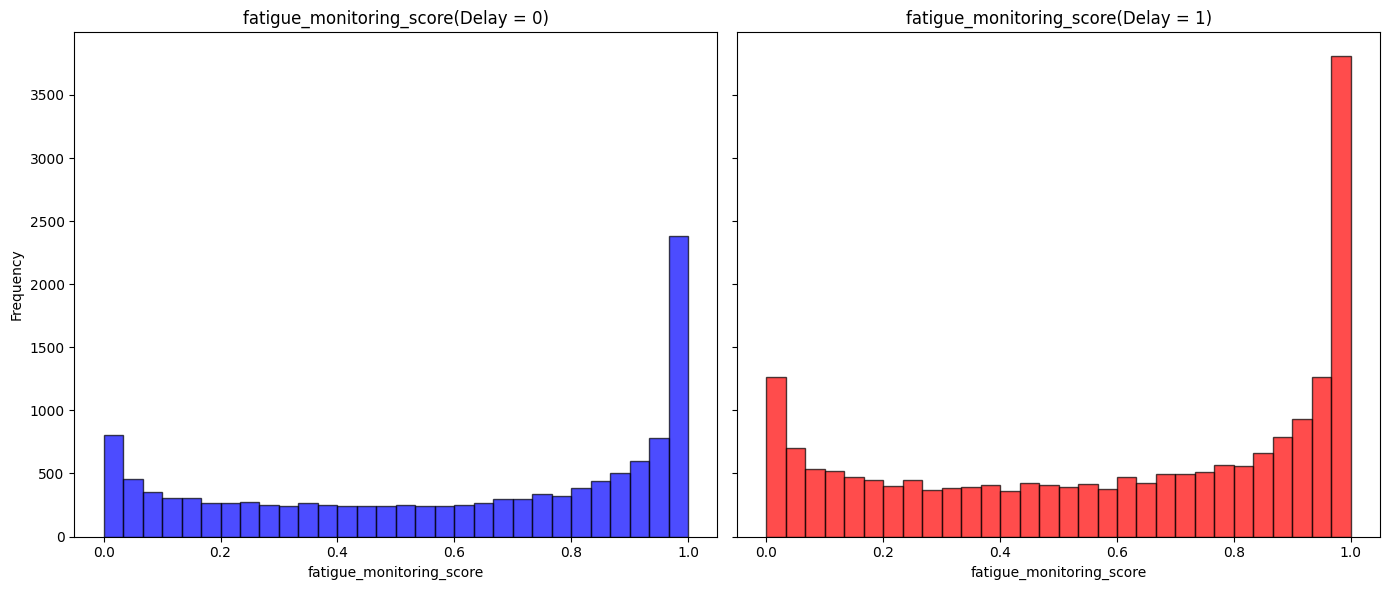

In [42]:
# Selecting the 'traffic_congestion_level' variable
variable18 = "fatigue_monitoring_score"

# Filtering data for delay = 0 and delay = 1
df_delay18_0 = df[df["delay"] == 0][variable18]
df_delay18_1 = df[df["delay"] == 1][variable18]

# Create subplots for separate histograms in one figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Histogram for delay = 0
axes[0].hist(df_delay18_0, bins=30, alpha=0.7, edgecolor="black", color="blue")
axes[0].set_title("fatigue_monitoring_score(Delay = 0)")
axes[0].set_xlabel(variable18)
axes[0].set_ylabel("Frequency")

# Histogram for delay = 1
axes[1].hist(df_delay18_1, bins=30, alpha=0.7, edgecolor="black", color="red")
axes[1].set_title("fatigue_monitoring_score(Delay = 1)")
axes[1].set_xlabel(variable18)

plt.tight_layout()
plt.show()


In [47]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd

In [4]:
# Load a specific sheet
df = pd.read_excel("D:/updated_supply_chain_logistics.xlsx")

In [5]:
X = df.iloc[:, :-5]  
y = df["delay"]

# Drop non-numeric columns if any
X = X.select_dtypes(include=['number'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = logreg.predict(X_test_scaled)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtrx = confusion_matrix(y_test, y_pred)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [11]:
print(accuracy)

0.6217059098705754


In [12]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2426
           1       0.62      1.00      0.77      3987

    accuracy                           0.62      6413
   macro avg       0.31      0.50      0.38      6413
weighted avg       0.39      0.62      0.48      6413



In [13]:
print(confusion_mtrx)

[[   0 2426]
 [   0 3987]]


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
confusion_mtrx_rf =  confusion_matrix(y_test, y_pred_rf)

In [15]:
print(accuracy_rf)

0.609543115546546


In [16]:
print(classification_rep_rf)

              precision    recall  f1-score   support

           0       0.39      0.06      0.10      2426
           1       0.62      0.94      0.75      3987

    accuracy                           0.61      6413
   macro avg       0.51      0.50      0.43      6413
weighted avg       0.54      0.61      0.51      6413



In [17]:
print(confusion_mtrx_rf)

[[ 145 2281]
 [ 223 3764]]


In [18]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
import xgboost as xgb

# Training XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
confusion_mtrx_xgb =  confusion_matrix(y_test, y_pred_xgb)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
print(accuracy_xgb)

0.5722750662716357


In [24]:
print(classification_rep_xgb)

              precision    recall  f1-score   support

           0       0.37      0.19      0.25      2426
           1       0.62      0.80      0.70      3987

    accuracy                           0.57      6413
   macro avg       0.50      0.50      0.48      6413
weighted avg       0.53      0.57      0.53      6413



In [25]:
print(confusion_mtrx_xgb)

[[ 465 1961]
 [ 782 3205]]


C:\Users\user\AppData\Local\Temp\ipykernel_2064\1250703359.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[feature_x], y=df[feature_y], palette="coolwarm", alpha=0.6)
C:\Users\user\AppData\Local\Temp\ipykernel_2064\1250703359.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="geographical")


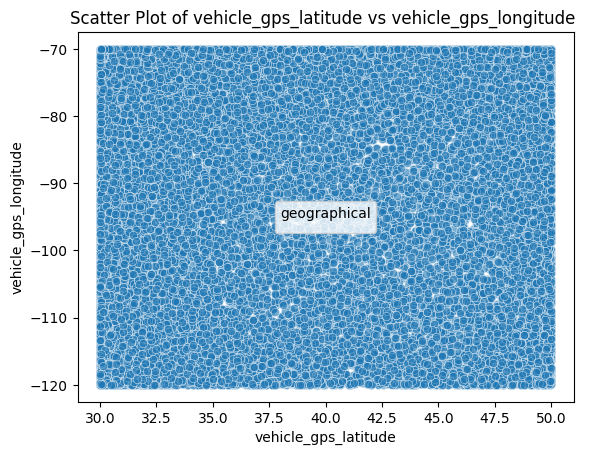

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_x = "vehicle_gps_latitude"
feature_y = "vehicle_gps_longitude"

# Scatter plot
plt.figure()
sns.scatterplot(x=df[feature_x], y=df[feature_y], palette="coolwarm", alpha=0.6)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Scatter Plot of {feature_x} vs {feature_y}")
plt.legend(title="geographical")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate sample data
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=1000)  # Sample from a normal distribution
data2 = np.random.normal(loc=0.5, scale=1, size=1000)  # Sample from a different normal distribution

# One-Sample K-S Test
# Test if data1 comes from a normal distribution with mean=0 and std=1
ks_statistic, p_value = stats.kstest(data1, 'norm', args=(0, 1))
print(f"One-Sample K-S Test: Statistic={ks_statistic}, p-value={p_value}")

# Two-Sample K-S Test
# Test if data1 and data2 come from the same distribution
ks_statistic_2sample, p_value_2sample = stats.ks_2samp(data1, data2)
print(f"Two-Sample K-S Test: Statistic={ks_statistic_2sample}, p-value={p_value_2sample}")

# Plotting the empirical cumulative distribution functions (ECDFs)
plt.figure(figsize=(12, 6))

# ECDF for data1
sns.ecdfplot(data1, label='Data1 ECDF', color='blue')
# ECDF for data2
sns.ecdfplot(data2, label='Data2 ECDF', color='orange')

plt.title('Empirical Cumulative Distribution Functions')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.legend()
plt.grid()
plt.show()

In [ ]:
The K-S statistic indicates the maximum distance between the empirical distribution and
the theoretical distribution(or between the two empirical distributions).
The p-value helps determine whether to reject the null hypothesis. A small p-value (typically < 0.05)
indicates that you can reject the null hypothesis, suggesting that the samples do not come from 
the same distribution (or that the sample does not come from the specified distribution).